<a href="https://colab.research.google.com/github/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/main/DriftDetectionSystem_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intrusion Detection System
Aimed to create a classification model to predict if a connection made is benign or anomal. 

In [2]:
#IMPORTS
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB 
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score


In [ ]:
#LOADING THE DATASET
train_df = pd.read_csv('https://raw.githubusercontent.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/main/Train_data.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/main/Test_data.csv')

In [ ]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## Considering only the train data for EDA and training.

In [ ]:
#ROW AND COLUMN DIMENSIONS 
print("Row size = {}, Column size = {}".format(train_df.shape[0],train_df.shape[1]))

Row size = 25192, Column size = 42


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_df.drop("class", axis=1), train_df['class'], test_size=0.3)

In [ ]:
#CHECKING FOR MISSING VALUES
x_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
#DESCRIPTIVE STATISTICS 
x_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,17634.000000,1.763400e+04,1.763400e+04,17634.000000,17634.000000,17634.0,17634.000000,17634.000000,17634.000000,17634.000000,...,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000
mean,314.119088,3.116214e+04,3.478523e+03,0.000113,0.022627,0.0,0.204264,0.001588,0.395486,0.298571,...,183.296813,114.891913,0.518026,0.082536,0.145418,0.031267,0.288581,0.283346,0.118018,0.119020
std,2744.703956,2.879621e+06,8.899371e+04,0.010649,0.253593,0.0,2.198511,0.053227,0.488969,12.313365,...,98.700605,110.939670,0.450398,0.187283,0.306635,0.109228,0.446747,0.447923,0.306104,0.317719
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,86.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,255.000000,60.000000,0.500000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.557500e+02,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.010000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,0.0,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Insights Drawn:


*   There are a few binary ( not useful) and redundant features
*   A few features are categorical and need to be encoded into numerical value types
* Some features are to be normalized due to the the high scale difference



In [ ]:
#COLUMNS WHICH ARE NOT USEFUL
print(x_train['is_host_login'].value_counts())
print(x_train['num_outbound_cmds'].value_counts())

0    17634
Name: is_host_login, dtype: int64
0    17634
Name: num_outbound_cmds, dtype: int64


In [ ]:
#DROPPING COLUMNS WHICH AREN'T USEFUL FOR TRAINING
x_train.drop(['num_outbound_cmds', 'is_host_login', 'urgent'], axis=1, inplace=True)
x_test.drop(['num_outbound_cmds', 'is_host_login', 'urgent'], axis=1, inplace=True)

In [ ]:
#CHECKING FOR IMBALANCE IN TARGET COLUMN
y_train.value_counts()

normal     9394
anomaly    8240
Name: class, dtype: int64

* No singnificant imbalance identified
* Eliminates the need for upsampling or careful downsampling



([<matplotlib.patches.Wedge at 0x7f44b85e0640>,
 [Text(-0.1128761499904384, 1.094193298628417, 'Normal'),
  Text(0.11287604754466744, -1.0941933091966403, 'Anamoly')],
 [Text(-0.06156880908569366, 0.5968327083427728, '53%'),
  Text(0.06156875320618223, -0.5968327141072582, '47%')])

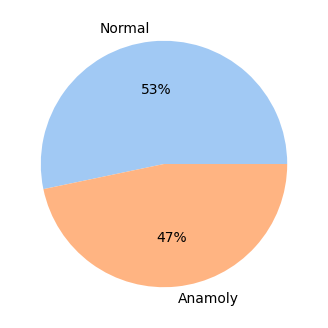

In [ ]:
#colors = sns.color_palette('pastel')[0:5]
plt.pie(y_train.value_counts(), labels = ['Normal', 'Anamoly'],colors = colors, autopct='%.0f%%')

<Axes: xlabel='protocol_type', ylabel='count'>

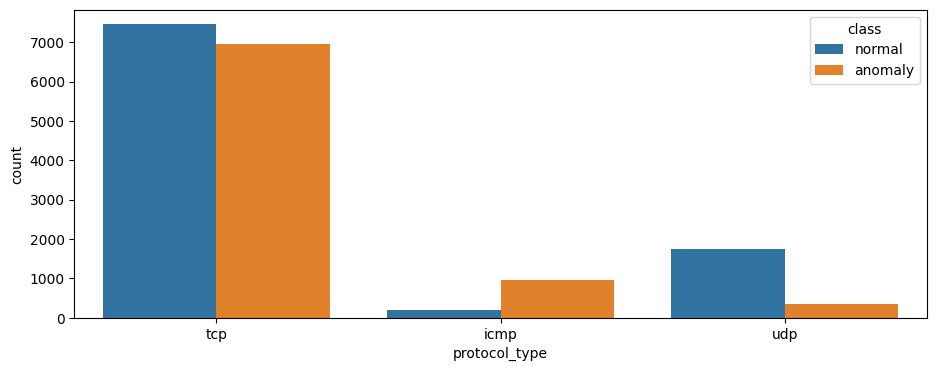

In [ ]:
sns.countplot(x=x_train['protocol_type'], hue=y_train)


Almost 80% of the traffic belongs to 'tcp' and the rest to 'udp' and 'icmp'


<Axes: xlabel='flag', ylabel='count'>

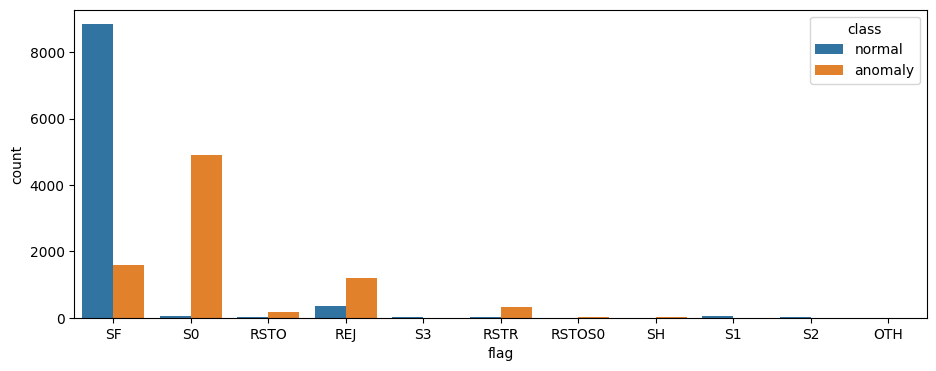

In [ ]:
sns.countplot(x=x_train['flag'], hue=y_train)

* Majority of SF flagged traffic was normal 
* SO flagged traffic contributed the  majority of the anomalies



In [ ]:
#ENCODING THE TARGET CLASS AS 1 IF ANOMALY ELSE 0
y_train = y_train.apply(lambda x: 1 if x=="anomaly" else 0)
y_test = y_test.apply(lambda x: 1 if x=="anomaly" else 0)

In [ ]:
#CHECKING FOR CORRELATION AMONG THE FEATURES
x_train.corr().head()

<ipython-input-16-bc02b4ef7f3c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_train.corr().head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.101095,0.015663,-0.001222,-0.009955,0.007376,0.012568,-0.065875,0.104210,0.054551,...,0.056600,-0.114257,-0.121314,0.273433,0.247080,-0.024882,-0.067483,-0.066566,0.192781,0.210822
src_bytes,0.101095,1.000000,0.005255,-0.000115,-0.000936,0.000829,-0.000283,-0.003749,-0.000232,-0.000448,...,-0.010801,-0.009525,-0.008145,0.001411,0.001737,-0.001738,-0.006789,-0.006668,-0.002178,0.007680
dst_bytes,0.015663,0.005255,1.000000,-0.000455,-0.003703,0.004472,0.005322,0.022947,0.041771,0.025853,...,-0.030704,0.004183,0.021332,-0.012831,0.012848,-0.005738,-0.018428,-0.017476,-0.015241,-0.013641
land,-0.001222,-0.000115,-0.000455,1.000000,-0.000924,-0.000955,-0.000281,-0.008608,-0.000248,-0.000454,...,-0.019630,-0.010470,0.011366,-0.004714,0.029243,0.063930,0.017158,0.006745,-0.004136,-0.004033
wrong_fragment,-0.009955,-0.000936,-0.003703,-0.000924,1.000000,-0.007779,-0.002292,-0.070119,-0.002021,-0.003699,...,0.037711,-0.040994,-0.045609,0.062019,0.038129,-0.020143,-0.049949,-0.054187,0.029857,-0.032852


<ipython-input-17-c2384dd0c47e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x_train.corr(), cmap= 'RdBu', vmin = -1, vmax = 1)


<Axes: >

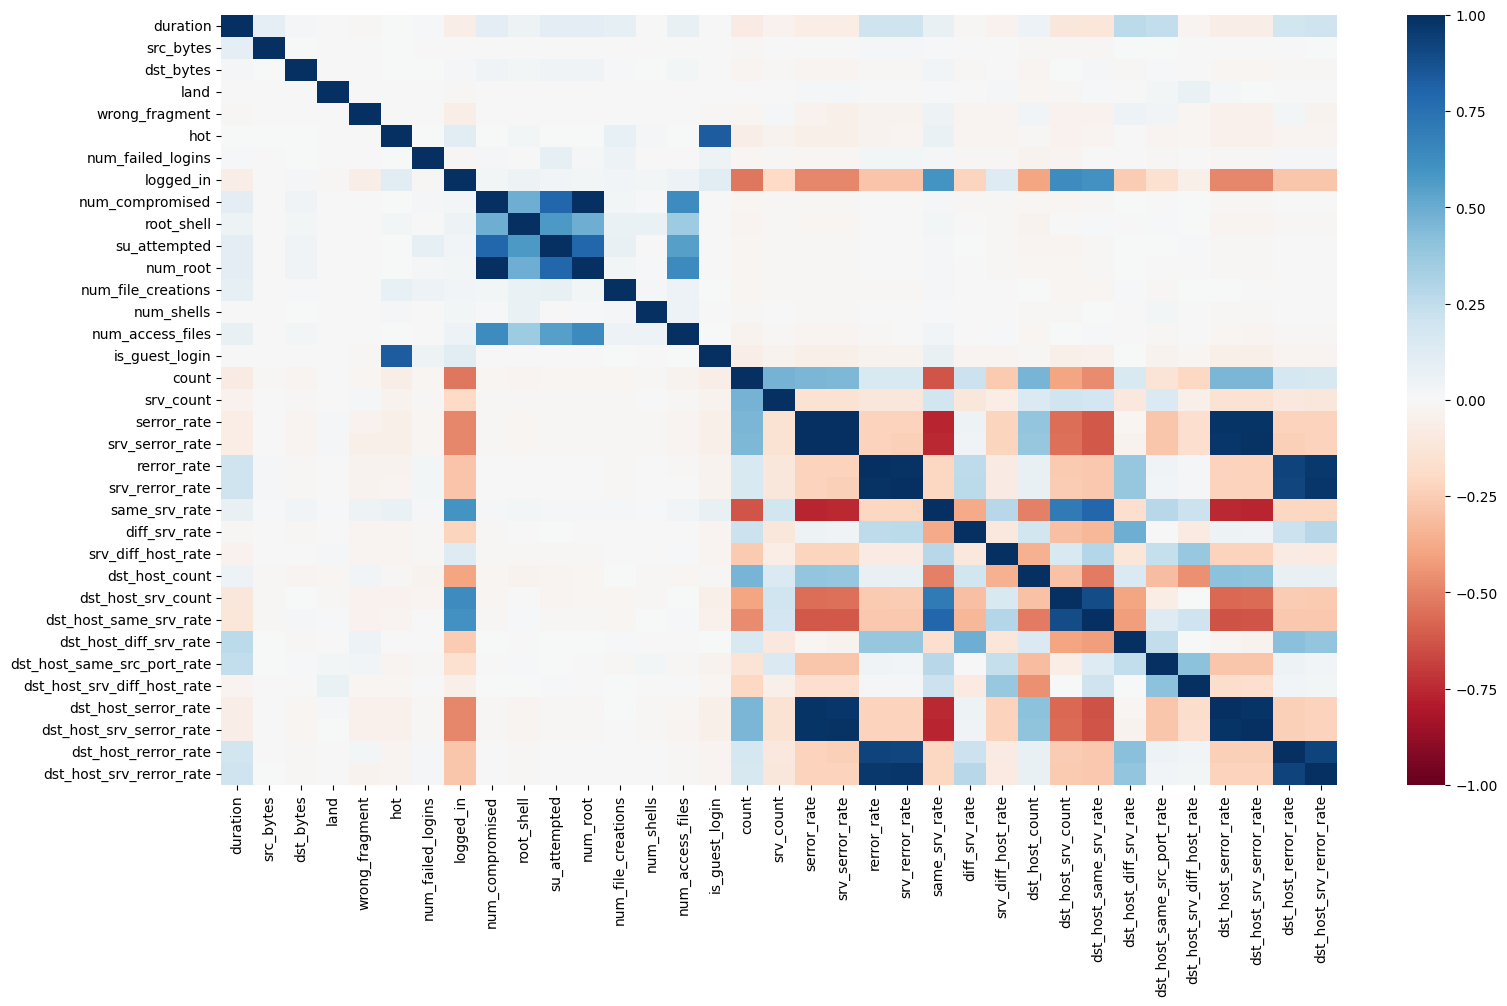

In [ ]:
#PLOTTING A HEAT MAP TO SEE FOR CORRELATION
plt.figure(figsize=(18,10))
sns.heatmap(x_train.corr(), cmap= 'RdBu', vmin = -1, vmax = 1)

We see a uniform chart as we have dropped the features which aren't useful



In [ ]:
#CORRELATION FOR EACH OF THE FEATURE WITH THE TARGET VARIABLE 
corr_y = x_train.corrwith(y_train).apply(abs)
corr_y

<ipython-input-18-4e05c7e13318>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_y = x_train.corrwith(y_train).apply(abs)


duration                       0.052977
src_bytes                      0.007260
dst_bytes                      0.019911
land                           0.000717
wrong_fragment                 0.092787
hot                            0.010304
num_failed_logins              0.002929
logged_in                      0.690130
num_compromised                0.019693
root_shell                     0.021169
su_attempted                   0.027002
num_root                       0.021046
num_file_creations             0.020648
num_shells                     0.012925
num_access_files               0.037527
is_guest_login                 0.034614
count                          0.575815
srv_count                      0.002516
serror_rate                    0.647109
srv_serror_rate                0.644565
rerror_rate                    0.263467
srv_rerror_rate                0.262580
same_srv_rate                  0.747715
diff_srv_rate                  0.194789
srv_diff_host_rate             0.119058


In [ ]:
#CHECKING FOR FEATURES WHICH COULD HIGHLY CONTRIBUTE TO OUR ML MODEL
corr_y[corr_y>0.7]

same_srv_rate         0.747715
dst_host_srv_count    0.718810
dtype: float64



*   Low correlation for many features is a good sign here
*   Correlation can (sometimes) indicate the presence of a causal relationship
* Multicollinearity can lead to skewed or misleading results



In [ ]:
#ENCODING CATEGORICAL DATA (using custom encoder found on web)
class LabelEncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data):
        self.label_encoder = self.label_encoder.fit(list(data) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data):
        new_data = list(data)
        for unique_item in np.unique(data):
            if unique_item not in self.label_encoder.classes_:
                new_data = ['Unknown' if x==unique_item else x for x in new_data]
        return self.label_encoder.transform(new_data)

In [ ]:
#USING THE CUSTOM FUNCTION TO ENCODE THE CATEGORICAL COLUMNS 
le = LabelEncoderExt()

for col in x_train.select_dtypes("object"):
  le.fit(x_train[col])
  x_train[col] = le.transform(x_train[col])
  x_test[col] = le.transform(x_test[col])

In [ ]:
#NORMALIZE NUMERIC DATA
scaler = StandardScaler()
cols = x_train.columns

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns = cols)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = cols)

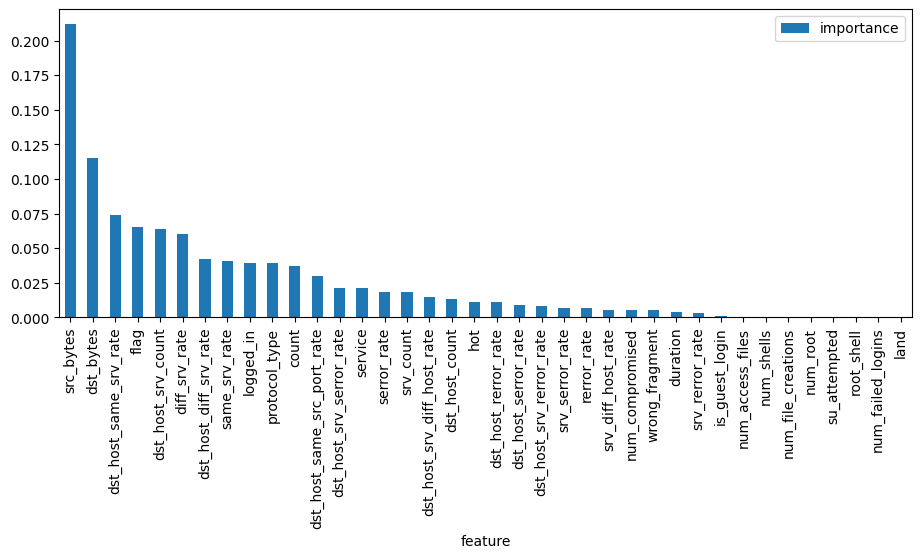

In [ ]:
#FEATURE SELECTION
rfc = RandomForestClassifier();

rfc.fit(x_train_scaled, y_train);

score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':x_train_scaled.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
#USING RANDOM FOREST CLASSIFIER ON THE TRAINING SET AND PLOTTING THE IMPORTANCE OF THE FEATURES 
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
#USING RFE FOR FEATURE EXTRACTION
estimator = RandomForestClassifier()
selector = RFE(estimator)
selector.fit(x_train_scaled, y_train)

X_train_scaled = selector.transform(x_train_scaled)
X_test_scaled = selector.transform(x_test_scaled)

In [ ]:
#MODEL FIT
# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(x_train_scaled, y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(x_train_scaled, y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(x_train_scaled, y_train)

BernoulliNB()

In [ ]:
models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, x_train_scaled, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(x_train_scaled))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(x_train_scaled))
    classification = metrics.classification_report(y_train, v.predict(x_train_scaled))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8959393324355645

Model Accuracy:
 0.8959963706476126

Confusion matrix:
 [[8949  460]
 [1374 6851]]

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      9409
           1       0.94      0.83      0.88      8225

    accuracy                           0.90     17634
   macro avg       0.90      0.89      0.89     17634
weighted avg       0.90      0.90      0.90     17634



============================== KNeighborsClassifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9916637727127153

Model Accuracy:
 0.9944992627877963

Confusion matrix:
 [[9372   37]
 [  60 8165]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      9409
           1       1.00      0.99      0.9

In [ ]:
#MODEL PERFORMANCE ON TEST DATA
for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(x_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(x_test))
    classification = metrics.classification_report(y_test, v.predict(x_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.8880656258269384

Confusion matrix:
 [[3931  109]
 [ 737 2781]]

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      4040
           1       0.96      0.79      0.87      3518

    accuracy                           0.89      7558
   macro avg       0.90      0.88      0.89      7558
weighted avg       0.90      0.89      0.89      7558



============================== KNeighborsClassifier Model Test Results ==============================

Model Accuracy:
 0.46440857369674515

Confusion matrix:
 [[2106 1934]
 [2114 1404]]

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51      4040
           1       0.42      0.40      0.41      3518

    accuracy                           0.46      7558
   macro avg       0.46     

In [ ]:
#CALCULATING THE PERCENTAGE OF INCORRENT PREDICTIONS OF THE MODELS
from sklearn.metrics import hamming_loss

for i, v in models:
    y_pred = v.predict(x_test)
    h_loss = hamming_loss(y_test, y_pred)

    print()
    print('============================== {} Percentage of INCORRECT Predictions =============================='.format(i))
    print()
    print ("Hamming Loss:" ,h_loss*100)
    print()        


============================== Naive Baye Classifier Percentage of INCORRECT Predictions ==============================

Hamming Loss: 11.193437417306166


============================== KNeighborsClassifier Percentage of INCORRECT Predictions ==============================

Hamming Loss: 53.55914263032548


============================== LogisticRegression Percentage of INCORRECT Predictions ==============================

Hamming Loss: 37.549616300608626

